In [140]:
%matplotlib inline
import pandas as pd
import clean_tweets_dataframe
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import os
import re

In [141]:
# Function: takes a csv file path and reads it into a dataframe
def read_final_data(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print("File is successfully read as csv")
        return df
    except FileNotFoundError:
        print("File Not Found!")

In [142]:
# Reading the cleaned and final data "clean_tweets"
df = read_final_data('cleaned_tweets.csv')

File is successfully read as csv


In [143]:
# View overall insights about the columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   polarity            21997 non-null  float64
 4   subjectivity        21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       17257 non-null  float64
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
 15  friends_count       21997 non-null  float64
dtypes: f

In [144]:
# Expose(view) the first 10 lines of the data
df.head(10)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count
0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,2.0,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN,-1.250000e-01
1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,201.0,ZIisq,65,272,NaN,China Taiwan,IndoPac_Info,NaN,-1.000000e-01
2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,NaN,Fin21Free,85,392,NaN,XiJinping,ZelenskyyUa,Netherlands,0.000000e+00
3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,NaN,Fin21Free,85,392,NaN,XiJinping,NaN,Netherlands,1.000000e-01
4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,381.0,VizziniDolores,910,2608,NaN,NaN,ChinaUncensored,"Ayent, Schweiz",-6.938894e-18
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,2.000000e-01,0.500000,en,116,36.0,GraceCh15554845,207,54,NaN,Taiwan,benedictrogers,"Melbourne, Victoria",2.000000e-01
6,2022-08-07 22:30:59+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @TGTM_Official: What kind of country can co...,1.583333e-01,0.800000,en,1106,411.0,Philipkuma1,12,264,NaN,Taiwan TsaiIngwen,TGTM_Official,NaN,1.583333e-01
7,2022-08-07 22:30:59+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd singer Roger Wate...,0.000000e+00,0.000000,en,10,5.0,nhohn2011,870,508,NaN,PinkFloyd Taiwan China,ChinaInfo777,"Florida, USA",0.000000e+00
8,2022-08-07 22:30:50+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @AmbQinGang: China's SC&amp;FM Wang Yi elab...,0.000000e+00,0.000000,en,1221,239.0,ClaudioColomaRI,127,263,NaN,Taiwan,AmbQinGang,El mundo periférico,0.000000e+00
9,2022-08-07 22:30:45+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CGMeifangZhang: Chinese ambassador to the ...,2.000000e-01,0.375000,en,49,25.0,jmarzola1,213,877,NaN,USA Pelosi Taiwan China,CGMeifangZhang,NaN,2.000000e-01


In [145]:
# Inspecting some columns of the data randomly
df['followers_count']
df['followers_count'].value_counts

<bound method IndexOpsMixin.value_counts of 0        20497
1           65
2           85
3           85
4          910
         ...  
21992       62
21993       94
21994       88
21995      537
21996       62
Name: followers_count, Length: 21997, dtype: int64>

In [146]:
# Check if there are any null values and print the sum
total_null_inorginal_text = df['original_text'].isnull().sum()
total_null_inpolarity = df['polarity'].isnull().sum()

print(f'Total null values in oringal_text column: {total_null_inorginal_text}')
print(f'Total null values in polarity cloumn: {total_null_inpolarity}')

Total null values in oringal_text column: 0
Total null values in polarity cloumn: 0


In [147]:
# Count the number of english language tweets
df['lang'].value_counts()

en    21997
Name: lang, dtype: int64

In [148]:
# Create cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns = ['clean_text', 'polarity'])

cleanedTweet['clean_text'] = df['original_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace = True)

In [149]:
#Check for null values in the new dataframe
cleanedTweet.isnull().sum()

clean_text    0
polarity      0
dtype: int64

In [154]:
# Removal of unwanted characters from the tweet like @,#,links, mentions and RTs
def tweetcleaner(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'RT[\S]+', '', text)
    return text

In [155]:
#Apply "tweetcleaner" over the data
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(tweetcleaner)
cleanedTweet

,clean_text,polarity
0,RT ameztoy Extra random image I Lets focus in ...,-1.250000e-01
1,RT Info China s media explains the military re...,-1.000000e-01
2,China even cut off communication they don t an...,0.000000e+00
3,Putin to XiJinping I told you my friend Taiwan...,1.000000e-01
4,RT I m sorry I thought Taiwan was an independe...,-6.938894e-18
...,...,...
21992,RT Info A good infographic of China s missile ...,7.000000e-01
21993,RT Info A good infographic of China s missile ...,7.000000e-01
21994,Thanks Pelosi smart move,2.071429e-01
21995,RT Info Taiwan people s Desire for Unification...,5.000000e-02


In [156]:
# Function: converts polarity into a positive, negative or neutral string
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "negative"
    else:
        return "neutral"

In [157]:
# Apply the text_category function on cleanedTweet to score the polarity of the tweet
cleanedTweet['sentiment'] = cleanedTweet['polarity'].apply(text_category)

In [158]:
# Observe the effect of applyin the text_ctegory function
cleanedTweet['sentiment']

0         neutral
1         neutral
2        negative
3        positive
4         neutral
           ...   
21992    positive
21993    positive
21994    positive
21995    positive
21996    positive
Name: sentiment, Length: 21997, dtype: object

In [159]:
#Count the values present in the data
cleanedTweet['sentiment'].value_counts()

negative    8982
positive    8182
neutral     4833
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Graph'}>

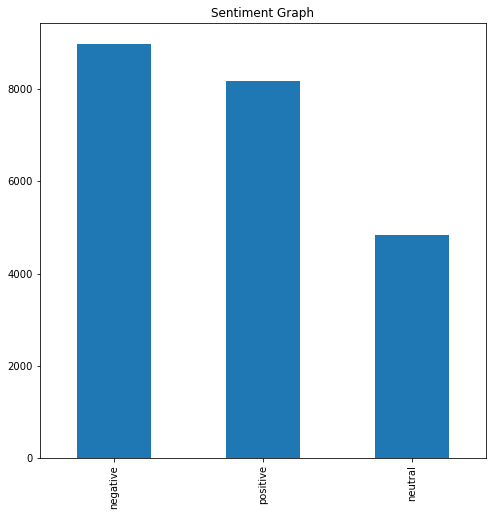

In [160]:
#Use bar chart to observe the frequencies of occerence of each of the three scores in the data
score_count =  cleanedTweet['sentiment'].value_counts()
score_count.plot(kind="bar", y="sentiment", title="Sentiment Graph", figsize=[8, 8])

<AxesSubplot:title={'center':'Senitment Pie Chart'}, ylabel='sentiment'>

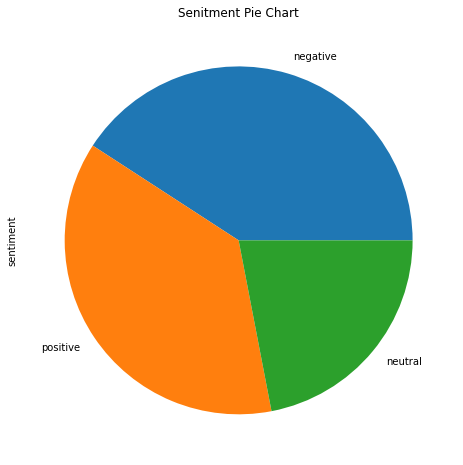

In [161]:
#Using pie chart to visualize the contribution of each of the scores in the data to the whole data
score_count.plot(kind="pie", y="Sentiment", title="Senitment Pie Chart", x="", figsize=[8, 8])

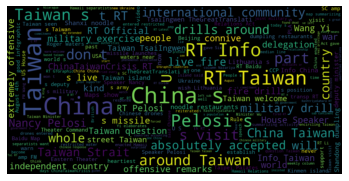

<Figure size 57600x43200 with 0 Axes>

In [162]:
#Plot The Word cloud
allWords = ' '.join( [twts for twts in cleanedTweet['clean_text']] )
wordCloud = WordCloud(width = 1600, height = 800, random_state = 22, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.figure(figsize = (800, 600))
plt.show()

In [163]:
# Data Preparation for Modeling and Sentiment Analysis
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    
    #text Preprocessing
    cleanedTweet['clean_text']=cleanedTweet['clean_text'].astype(str)
    cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(lambda x: x.lower())
    cleanedTweet['clean_text']= cleanedTweet['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in cleanedTweet['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return word_list, word_to_id, corpus_1

In [164]:
PrepareData_obj=PrepareData(cleanedTweet)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [171]:
print(corpus[3])

[(7, 2), (19, 1), (24, 1), (36, 1), (38, 1), (41, 1), (54, 1), (58, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2)]


In [172]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [174]:
print(id_words[3])

[('i', 2), ('the', 1), ('china', 1), ('s', 1), ('taiwan', 1), ('but', 1), ('putin', 1), ('to', 2), ('xijinping', 1), ('a', 1), ('be', 1), ('eyes', 1), ('friend', 1), ('including', 1), ('it', 1), ('like', 1), ('model', 1), ('much', 1), ('my', 1), ('nukes', 1), ('open', 1), ('pelosi', 1), ('state', 1), ('told', 1), ('took', 1), ('ukrainian', 1), ('vassal', 1), ('warned', 1), ('will', 1), ('you', 2)]


In [175]:
# Topic Modeling using Latent Dirichlet Allocation
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [176]:
pprint(lda_model.print_topics())

[(0,
  '0.042*"rt" + 0.035*"taiwan" + 0.033*"that" + 0.029*"china" + 0.025*"s" + '
  '0.025*"launches" + 0.024*"infographic" + 0.024*"with" + 0.023*"is" + '
  '0.022*"the"'),
 (1,
  '0.037*"rt" + 0.037*"taiwan" + 0.033*"of" + 0.027*"the" + 0.020*"to" + '
  '0.018*"is" + 0.018*"you" + 0.016*"by" + 0.015*"a" + 0.015*"t"'),
 (2,
  '0.030*"they" + 0.022*"how" + 0.022*"are" + 0.020*"russia" + 0.019*"the" + '
  '0.019*"japan" + 0.019*"do" + 0.018*"usa" + 0.018*"with" + 0.016*"drones"'),
 (3,
  '0.058*"taiwan" + 0.043*"rt" + 0.038*"the" + 0.037*"on" + 0.036*"s" + '
  '0.034*"of" + 0.028*"china" + 0.026*"info" + 0.023*"in" + 0.017*"missile"'),
 (4,
  '0.048*"the" + 0.048*"to" + 0.043*"taiwan" + 0.040*"rt" + 0.030*"s" + '
  '0.027*"china" + 0.021*"in" + 0.021*"is" + 0.019*"pelosi" + 0.019*"and"')]


In [177]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('rt', 0.041678164),
   ('taiwan', 0.03504049),
   ('that', 0.033464253),
   ('china', 0.029401824),
   ('s', 0.024813699),
   ('launches', 0.024670843),
   ('infographic', 0.024392443),
   ('with', 0.024307504),
   ('is', 0.023480723),
   ('the', 0.022219148)]),
 (1,
  [('rt', 0.037234213),
   ('taiwan', 0.037055768),
   ('of', 0.032615263),
   ('the', 0.026638545),
   ('to', 0.01987146),
   ('is', 0.01845623),
   ('you', 0.01750323),
   ('by', 0.01632187),
   ('a', 0.015319501),
   ('t', 0.015029564)]),
 (2,
  [('they', 0.02951544),
   ('how', 0.021633232),
   ('are', 0.02154295),
   ('russia', 0.020196157),
   ('the', 0.01899873),
   ('japan', 0.01881948),
   ('do', 0.018613799),
   ('usa', 0.018156545),
   ('with', 0.018110821),
   ('drones', 0.015953772)]),
 (3,
  [('taiwan', 0.05803028),
   ('rt', 0.043364815),
   ('the', 0.03834587),
   ('on', 0.036732994),
   ('s', 0.035767287),
   ('of', 0.033827465),
   ('china', 0.028033452),
   ('info', 0.026491623),
   ('in', 0.023

In [178]:
#Model Analysis
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=48817d2342cade94a93813fe74e1fe37e8b11ca8809dd1f5bfa8c3c2c1af4851
  Stored in directory: c:\users\mikyg\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6f6c1cfec8796caa129e0255961a5a1cc68e33db8647a59de75a9e07ef544a1e
  Stored in directory: c:\users\mikyg\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d73

In [179]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.137023  0.015274       1        1  36.664808
3     -0.152168 -0.219520       2        1  22.939318
1     -0.046573  0.253279       3        1  18.120094
0     -0.041027  0.002487       4        1  13.348463
2      0.376791 -0.051521       5        1   8.927318, topic_info=      Term          Freq         Total Category  logprob  loglift
29    info   2832.000000   2832.000000  Default  30.0000  30.0000
131   that   3288.000000   3288.000000  Default  29.0000  29.0000
111     on   6883.000000   6883.000000  Default  28.0000  28.0000
58      to  10407.000000  10407.000000  Default  27.0000  27.0000
234   with   3178.000000   3178.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
446  their    353.666333    802.975460   Topic5  -4.7673   1.5961
28     for    597.082058   3663.170292   Topic5  -4.2436   0.6020
19     the    790.178552  16656.636679   Topic5  -3.9634  -0.6323
15      rt    548.487646  17712.984262   Topic5  -4.3285  -1.0588
118    and    413.165622   5648.696420   Topic5  -4.6118  -0.1993

[285 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
439       5  0.997696        160
281       1  0.014466          3
281       2  0.984896          3
177       2  0.999509        4th
748       4  0.998531          5
...     ...       ...        ...
60        1  0.998526  xijinping
81        3  0.928957        you
81        4  0.071023        you
532       3  0.997984       your
532       5  0.001126       your

[316 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

In [181]:
# Sentiment Analysis
import nltk

In [182]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

C:\Users\mikyg\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\mikyg\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='sentiment'>

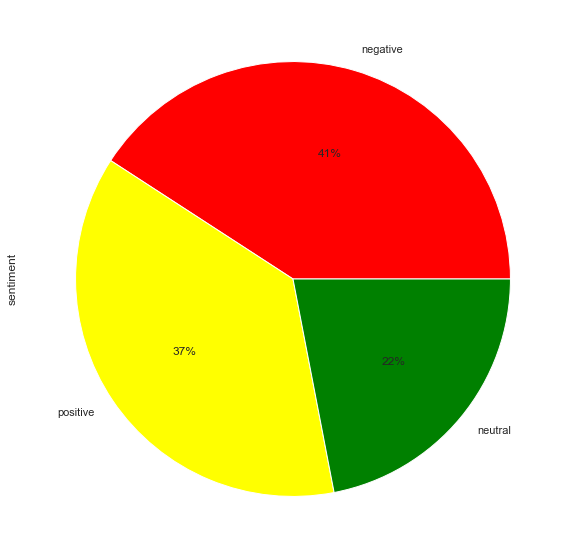

In [183]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
cleanedTweet.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

C:\Users\mikyg\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\mikyg\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='clean_text'>

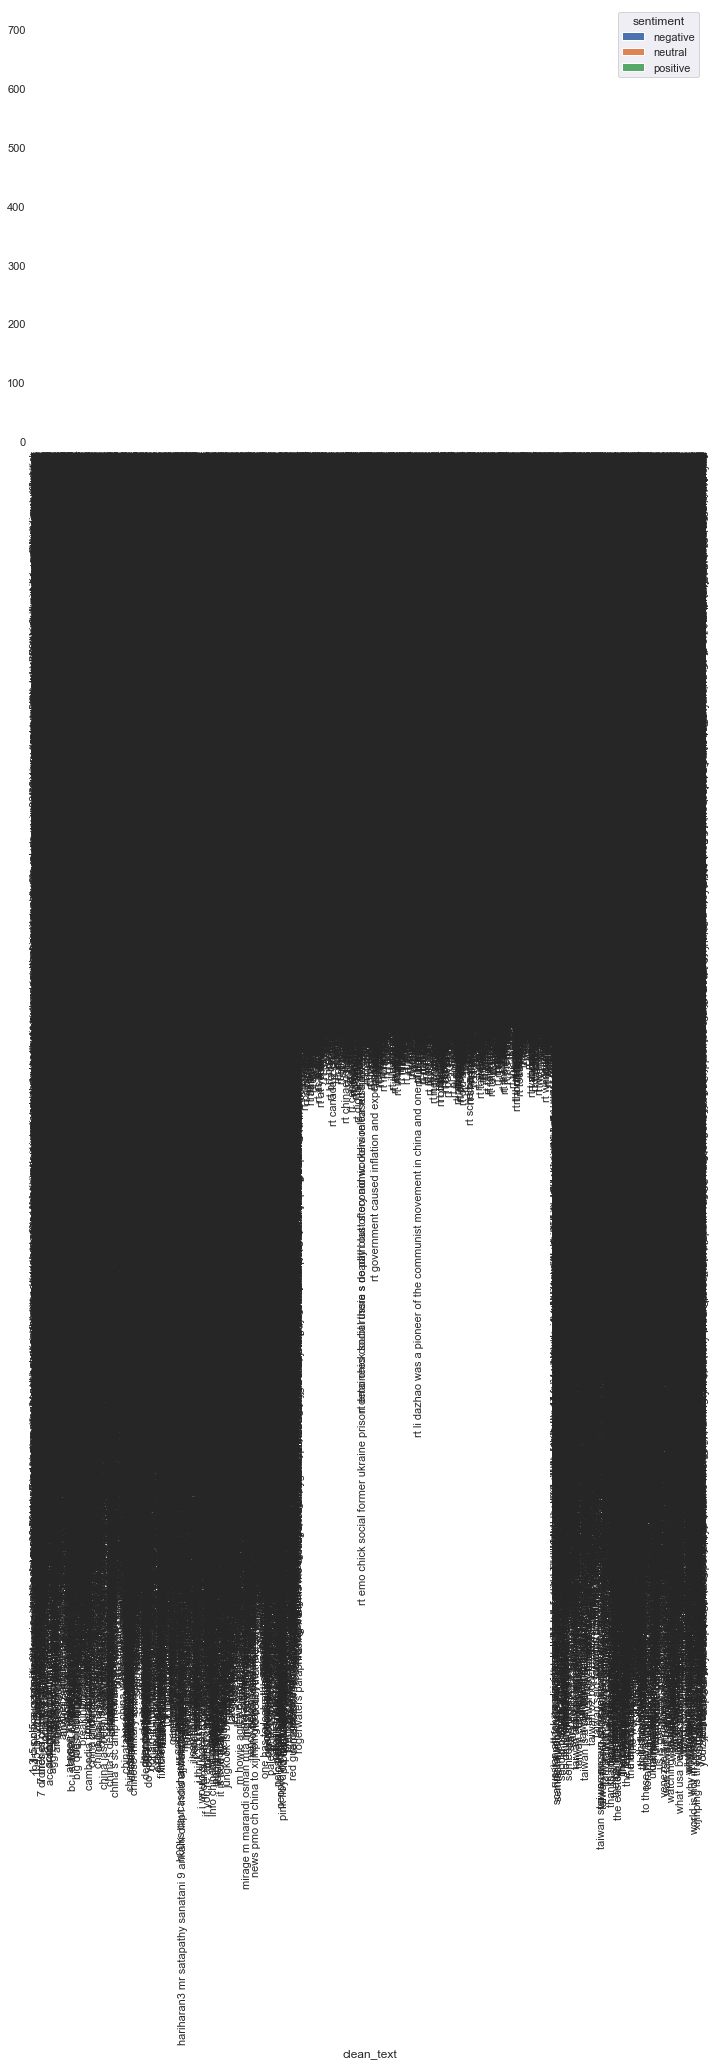

In [185]:
sns.set(rc={'figure.figsize':(12,8)})
cleanedTweet_sentiment = cleanedTweet.groupby(['clean_text', 'sentiment']).sentiment.count().unstack()
cleanedTweet_sentiment.plot(kind='bar')